In [1]:
import sys
import os

# 获取当前工作目录
current_dir = os.getcwd()

# 添加项目根目录到 sys.path
project_dir = os.path.abspath(os.path.join(current_dir, '../'))
sys.path.append(project_dir)

In [2]:
from comer.datamodule import vocab
from comer.lit_comer import LitCoMER
from torchvision.transforms import ToTensor
import torch
from PIL import Image
from IPython.display import display

import random

In [3]:
ckpt = '../lightning_logs/version_35/checkpoints/epoch=67-step=203183-val_ExpRate=0.3080.ckpt'

In [4]:
model = LitCoMER.load_from_checkpoint(ckpt)
model = model.eval()

device = torch.device('cpu')
# device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

In [5]:
img_path = '../data/test/img'
img_files = os.listdir(img_path)
k = random.randint(0, len(img_files) - 1)
fname = img_files[k]

0083498.bmp


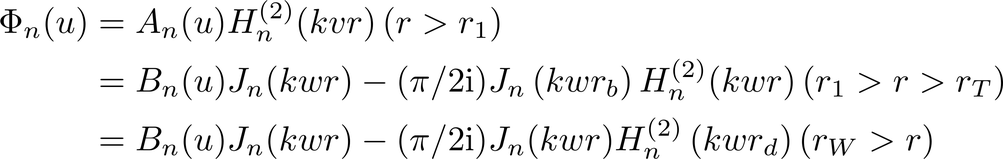

: 

In [6]:
img = Image.open(os.path.join(img_path, fname))
print(fname)
display(img)

In [7]:
img = ToTensor()(img)
img = img.to(device)
mask = torch.zeros_like(img, dtype=torch.bool)
hyp = model.approximate_joint_search(img.unsqueeze(0), mask)[0]
pred_latex = vocab.indices2label(hyp.seq)

In [ ]:
print(pred_latex)


NameError: name 'pred_latex' is not defined